## KNN from Scratch

K nearest neighbour is a simple yet great unsupervised ML algorithm. For this practical we will use the iris dataset

In [18]:
#standard packages and some bonus
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [16]:
#read in the data
data = pd.read_csv('KMeansData.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


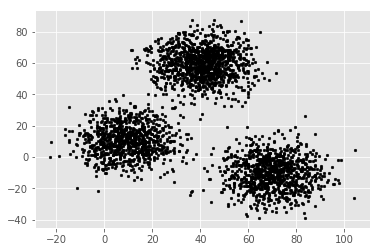

In [19]:
#lets plot the data to take a look at it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

Ok we can see that there are 3 obvious clusters

In [20]:
#Here we will define euclidean distance, this uses a numpy function that does the root
#square for us and will work on multiple features.
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [22]:
#Just from looking we can see that we have 3 clusters so lets set our K to 3
k = 3

In [24]:
#now we initialise an array of 3 random starting points called Centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[18. 22.]
 [11. 47.]
 [24. 32.]]


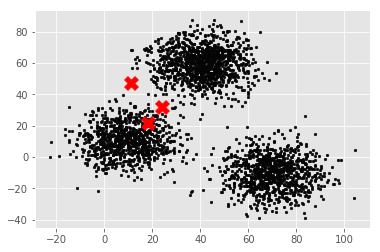

In [28]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='X', s=200, c='R')

Well our centroids are all a bit close but they will get better.

Now its time to run our K-means algorithm

In [30]:
#first of all create something that will save the old centroids
C_old = np.zeros(C.shape)
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [38]:
#This is an empty vector the length of X where the cluster that each data point was assigned to will be stored
Cl_asigned = np.zeros(len(X))
Cl_asigned

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
#in this case we will calculate the error of the overall model to be the distance between the new cluster and the previous cluster, this allows us to know when
#to stop running the algorithm
error = dist(C,C_old,None)
error

68.83313155741209

In [40]:
#now we will run a loop that calculates the distance of each row from all the clusters and assigns it to a cluster
while error != 0:
    #assign each row to a cluster in a for loop
    for i in range(len(X)):
        distance = dist(X[i],C)
        cluster = np.argmin(distance)
        Cl_asigned[i] = cluster
        
    #we need to save the previous values of Clusters as the old clusters we use deep copy because if we changed it a regular copy would change
    C_old = deepcopy(C)
    
    #We will now update our centroids by sorting the data into its assigned clusters and finding the mean of those.
    for i in range(k):
        #this extracts all the points for each cluster
        points = [X[j] for j in range(len(X)) if Cl_asigned[j] == i]
        #we then find the mean of each cluster
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    

In [41]:
error

0.0

In [43]:
C

array([[  9.478045,  10.686052],
       [ 40.683628,  59.715893],
       [ 69.92419 , -10.119641]], dtype=float32)

Looks like it worked our clusters have shifted lets take a look at them:

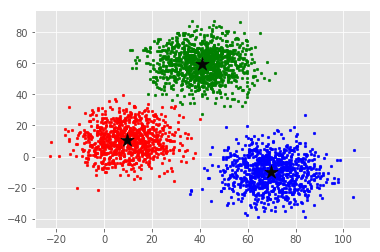

In [44]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if Cl_asigned[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

That looks really good, we have found the 3 clusters. You should now see what happens when you change the value of K and what it assigns

Next step is to make a K means function that does all of this for you:

In [ ]:
def K_means():